# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# **Uploading data and checking files**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
import io
carprice_data = pd.read_csv (io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [ ]:
carprice_data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
carprice_data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
carprice_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
carprice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Check Missing data**

In [ ]:
missingdata = carprice_data.isnull().sum()
missingdata

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
carprice_data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

**Renaming company names**

In [ ]:
carprice_data[['CompanyName','Model']] = carprice_data.CarName.str.split(" ", n=1, expand=True)
carprice_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [ ]:
carprice_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CompanyName', 'Model'],
      dtype='object')

In [ ]:
carprice_data = carprice_data[['car_ID', 'CompanyName', 'Model', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
carprice_data.head()

,car_ID,CompanyName,Model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100 ls,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
carprice_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
carprice_data['CompanyName'] = carprice_data['CompanyName'].replace({'alfa-romero':'Alfa-Romeo', 'maxda':'mazda','nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
carprice_data.CompanyName.unique()

array(['Alfa-Romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
carprice_data.loc[carprice_data.duplicated()]

,car_ID,CompanyName,Model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


**Converting non-numerical values into numerical values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
carprice_data['fueltype'] = labelencoder.fit_transform(carprice_data['fueltype'])
carprice_data['aspiration'] = labelencoder.fit_transform(carprice_data['aspiration'])
carprice_data['carbody'] = labelencoder.fit_transform(carprice_data['carbody'])
carprice_data['drivewheel'] = labelencoder.fit_transform(carprice_data['drivewheel'])
carprice_data['enginelocation'] = labelencoder.fit_transform(carprice_data['enginelocation'])
carprice_data['fuelsystem'] = labelencoder.fit_transform(carprice_data['enginelocation'])

In [ ]:
carprice_data.head()

,car_ID,CompanyName,Model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,Alfa-Romeo,giulia,3,1,0,two,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,Alfa-Romeo,stelvio,3,1,0,two,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,Alfa-Romeo,Quadrifoglio,1,1,0,two,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100 ls,2,1,0,four,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,1,0,four,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


**Checking relationship and dependency**

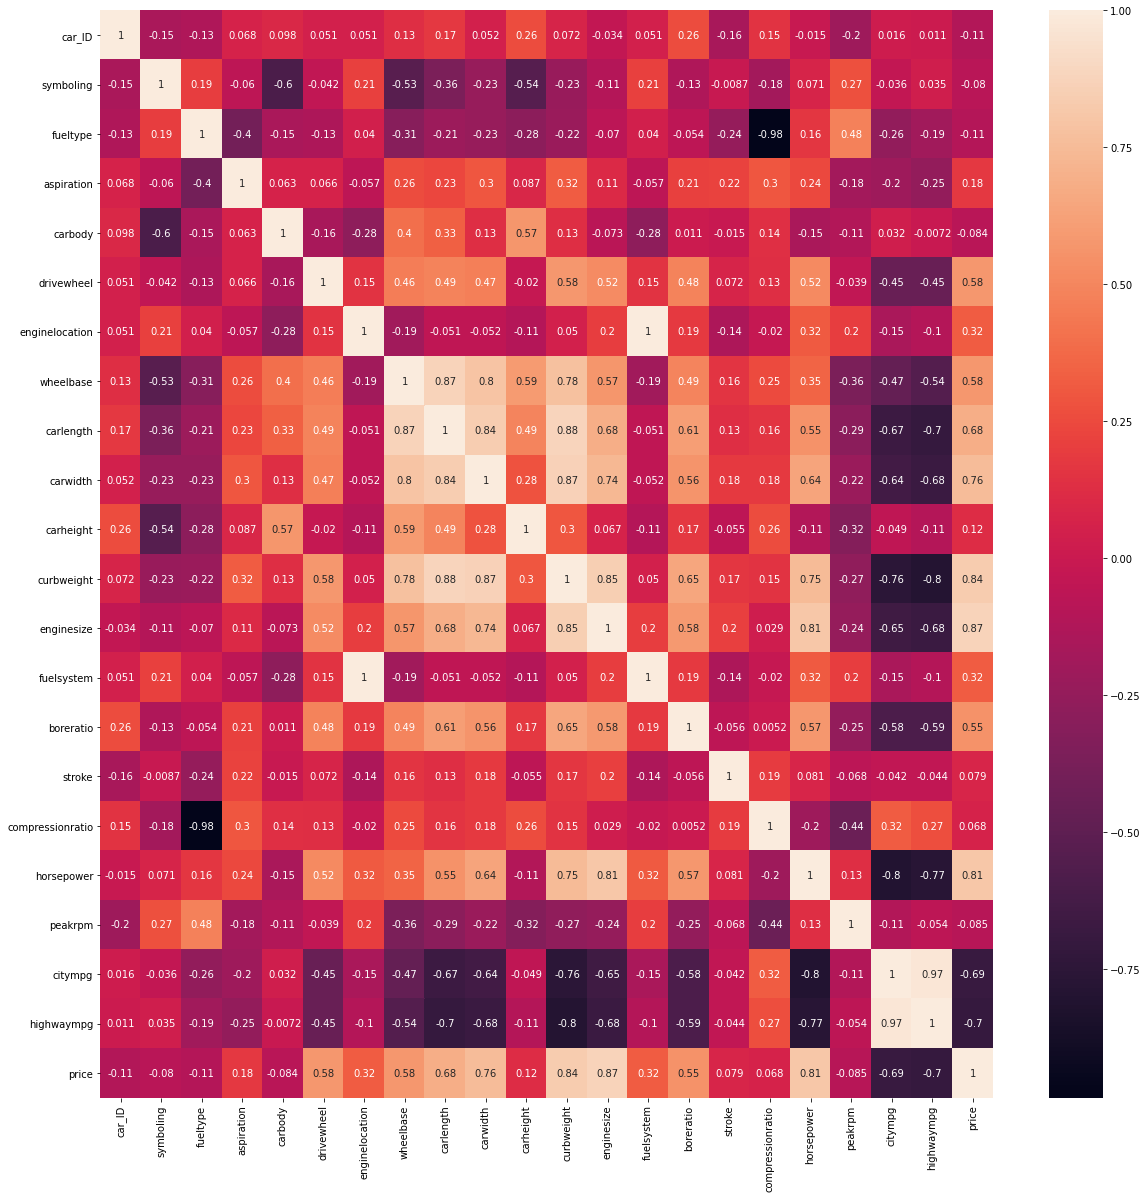

In [ ]:
import seaborn as sns
corre = carprice_data.corr()
top_corr_features = corre.index
plt.figure(figsize=(20,20))
g=sns.heatmap(carprice_data[top_corr_features].corr(),annot=True)
sns.color_palette("Spectral", as_cmap=True)

**Picking most correlated columns**

In [ ]:
newcar_data = carprice_data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength','wheelbase','drivewheel','price','enginelocation', 
                             'highwaympg']]

In [ ]:
newcar_data.columns

Index(['horsepower', 'boreratio', 'enginesize', 'curbweight', 'carwidth',
       'carlength', 'wheelbase', 'drivewheel', 'price', 'enginelocation',
       'highwaympg'],
      dtype='object')

In [ ]:
newcar_data.shape

(205, 11)

In [ ]:
newcar_data.head()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation,highwaympg
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0,27
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0,27
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0,26
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0,30
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0,22


**Normalizing the data**

In [ ]:
mean = newcar_data.mean(axis=0)
newcar_data -= mean
std = newcar_data.std(axis=0)
newcar_data /= std

In [ ]:
newcar_data.head()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation,highwaympg
0,0.174057,0.517804,0.074267,-0.014531,-0.842719,-0.425480,-1.686643,1.210367,0.027324,-0.121569,-0.544725
1,0.174057,0.517804,0.074267,-0.014531,-0.842719,-0.425480,-1.686643,1.210367,0.403473,-0.121569,-0.544725
2,1.261448,-2.399008,0.602571,0.513625,-0.190101,-0.230948,-0.706865,1.210367,0.403473,-0.121569,-0.689938
3,-0.053537,-0.516003,-0.430023,-0.419770,0.136209,0.206750,0.173274,-0.587642,0.084279,-0.121569,-0.109087
4,0.275209,-0.516003,0.218350,0.515545,0.229440,0.206750,0.106848,-2.385652,0.522389,-0.121569,-1.270789


**Splitting the data**

In [ ]:
X = (newcar_data.loc[:, newcar_data.columns != 'price'])
y = (newcar_data.loc[:, newcar_data.columns == 'price'])

In [ ]:
X

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation,highwaympg
0,0.174057,0.517804,0.074267,-0.014531,-0.842719,-0.425480,-1.686643,1.210367,-0.121569,-0.544725
1,0.174057,0.517804,0.074267,-0.014531,-0.842719,-0.425480,-1.686643,1.210367,-0.121569,-0.544725
2,1.261448,-2.399008,0.602571,0.513625,-0.190101,-0.230948,-0.706865,1.210367,-0.121569,-0.689938
3,-0.053537,-0.516003,-0.430023,-0.419770,0.136209,0.206750,0.173274,-0.587642,-0.121569,-0.109087
4,0.275209,-0.516003,0.218350,0.515545,0.229440,0.206750,0.106848,-2.385652,-0.121569,-1.270789
...,...,...,...,...,...,...,...,...,...,...
200,0.249921,1.662375,0.338419,0.761377,1.394830,1.195622,1.717669,1.210367,-0.121569,-0.399512
201,1.413178,1.662375,0.338419,0.947672,1.348215,1.195622,1.717669,1.210367,-0.121569,-0.835151
202,0.755685,0.923942,1.106861,0.876611,1.394830,1.195622,1.717669,1.210367,-0.121569,-1.125577
203,0.047616,-1.180593,0.434474,1.270327,1.394830,1.195622,1.717669,1.210367,-0.121569,-0.544725


In [ ]:
y

,price
0,0.027324
1,0.403473
2,0.403473
3,0.084279
4,0.522389
...,...
200,0.446659
201,0.722042
202,1.027468
203,1.150765


In [ ]:
from sklearn.model_selection import train_test_split
train_sample, test_sample, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
print(train_sample.shape, train_labels.shape, test_sample.shape, test_labels.shape, X.shape, y.shape)

(143, 10) (143, 1) (62, 10) (62, 1) (205, 10) (205, 1)


In [ ]:
print (train_sample.shape[1], train_labels.shape[1])

10 1


**Creating Model**

In [ ]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(train_sample.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation='relu'))
  #model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6))
  #model.add(layers.Dense(1))
  return model

In [ ]:
model = build_model()

In [ ]:
model

**Validation Data**

In [ ]:
X_val = train_sample[:10]
partial_X_train = train_sample[10:]
y_val = train_labels[:10]
partial_y_train = train_labels[10:]

In [ ]:
print (len(X_val), len(partial_X_train), len(y_val), len(partial_y_train))

10 133 10 133


In [ ]:
print (X_val.shape, partial_X_train.shape, y_val.shape, partial_y_train.shape)

(10, 10) (133, 10) (10, 1) (133, 1)


**Compilation**

In [ ]:
model.compile (optimizer='rmsprop', loss='mse', metrics=['mae'])
history= model.fit(partial_X_train, partial_y_train, epochs= 100, batch_size=1, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
133/133 [==============================] - 1s 5ms/step - loss: 1.2407 - mae: 0.8119 - val_loss: 0.3786 - val_mae: 0.4867
Epoch 2/100
133/133 [==============================] - 0s 1ms/step - loss: 0.9020 - mae: 0.6899 - val_loss: 0.3092 - val_mae: 0.4445
Epoch 3/100
133/133 [==============================] - 0s 1ms/step - loss: 1.0221 - mae: 0.7051 - val_loss: 0.2601 - val_mae: 0.3954
Epoch 4/100
133/133 [==============================] - 0s 1ms/step - loss: 0.8377 - mae: 0.5937 - val_loss: 0.2179 - val_mae: 0.3558
Epoch 5/100
133/133 [==============================] - 0s 1ms/step - loss: 0.5594 - mae: 0.4834 - val_loss: 0.1784 - val_mae: 0.3229
Epoch 6/100
133/133 [==============================] - 0s 1ms/step - loss: 0.5119 - mae: 0.4730 - val_loss: 0.1438 - val_mae: 0.2884
Epoch 7/100
133/133 [==============================] - 0s 1ms/step - loss: 0.5256 - mae: 0.4867 - val_loss: 0.1181 - val_mae: 0.2555
Epoch 8/100
133/133 [==============================] - 0s 1ms/step - 

**MAE & Validation plots**

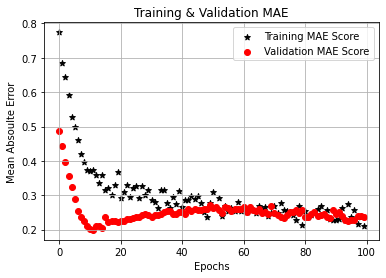

In [ ]:
y1= history.history['mae']
x1= history.history['val_mae']
x= range(100)
plt.scatter(x, y1, label= "Training MAE Score", color= "black", marker= "*")
plt.scatter(x, x1, label= "Validation MAE Score", color= "red")
plt.xlabel('Epochs')
plt.ylabel('Mean Absoulte Error')
plt.title('Training & Validation MAE')
plt.legend()
plt.grid()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

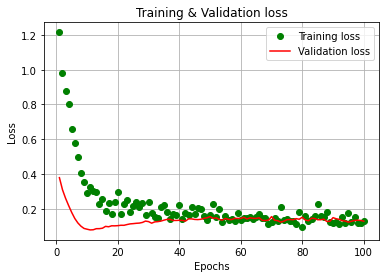

In [ ]:
plt.plot(epochs, loss,"go", label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation loss')
plt.legend()
plt.grid()
plt.show()

**Evaluation**

In [ ]:
model.evaluate(test_sample,test_labels)

2/2 [==============================] - 0s 5ms/step - loss: 0.1036 - mae: 0.2318


[0.10358661413192749, 0.23177509009838104]

**Model Prediction**

In [ ]:
results= model.predict(test_sample)
results

array([[-6.85944259e-01, -6.78097904e-01, -6.75652325e-01,
        -6.78316474e-01, -6.76018953e-01, -6.76953137e-01],
       [-5.33172011e-01, -5.05050659e-01, -4.89716411e-01,
        -5.02760172e-01, -5.19571662e-01, -5.00382781e-01],
       [-4.73246038e-01, -4.37171698e-01, -4.16781753e-01,
        -4.33896989e-01, -4.58204120e-01, -4.31121856e-01],
       [-3.41978192e-01, -2.95526564e-01, -2.94794083e-01,
        -3.02982509e-01, -3.05312991e-01, -2.91417956e-01],
       [-1.00856972e+00, -1.04354024e+00, -1.06831324e+00,
        -1.04905748e+00, -1.00640547e+00, -1.04983568e+00],
       [-4.57476199e-01, -4.19308990e-01, -3.97588611e-01,
        -4.15775269e-01, -4.42054927e-01, -4.12895471e-01],
       [ 6.51050150e-01,  6.47099137e-01,  6.99716330e-01,
         6.50966287e-01,  6.78146601e-01,  6.46425247e-01],
       [ 8.24004292e-01,  7.36311853e-01,  7.91662037e-01,
         7.32216418e-01,  8.12621653e-01,  7.21155107e-01],
       [-9.24575180e-02, -3.64788845e-02, -1.085

In [ ]:
results[2]

array([-0.47324604, -0.4371717 , -0.41678175, -0.433897  , -0.45820412,
       -0.43112186], dtype=float32)

In [ ]:
results[1]

array([-0.533172  , -0.50505066, -0.4897164 , -0.5027602 , -0.51957166,
       -0.5003828 ], dtype=float32)

In [ ]:
test_labels

,price
160,-0.693305
186,-0.598548
59,-0.554737
165,-0.498033
140,-0.710203
...,...
28,-0.545224
29,-0.039143
182,-0.688673
40,-0.373234
